pre-require: pytorch

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/nightly/cpu
     |████████████████████████████████| 143.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 262 kB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 710 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 153 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 532 kB 4.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


install dataset requirement

In [ ]:
!pip3 install -r requirements.txt

Found cached dataset cc6204-hackaton-cub-dataset (/Users/caizhengyu/.cache/huggingface/datasets/alkzar90___cc6204-hackaton-cub-dataset/default/0.0.0/de850c9086bff0dd6d6eab90f79346241178f65e1a016a50eec240ae9cdf2064)


  0%|          | 0/2 [00:00<?, ?it/s]

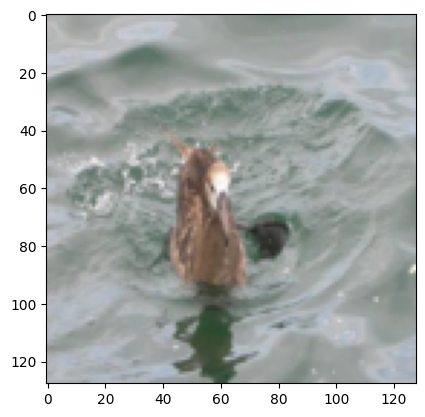

('this bird is brown with a lighter brown crest.', 'the wings are brown, long and narrow, and have white markings on the secondaries, the bill is blunt tipped and black, the head is light brown with a white thin marking between the eye and the beak.')


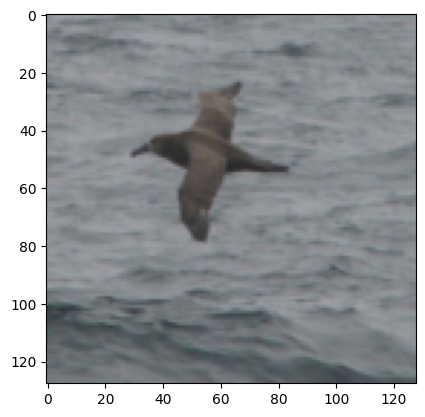

("here we have a bird soaring above the water and it's color is dark brown, he seems to have a long dark colored bill with a white ring around it on the upper part near the bill.", 'this flying bird has long brown wings and a black bill with a white stripe around it.')


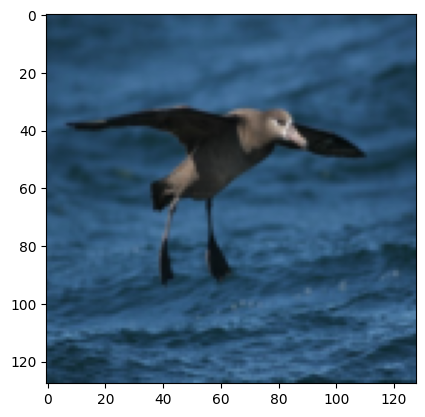

('this is mostly brown bird with webbed feet that are also brown.', 'bird with large wingspan, very long and thick downward curved beak.')


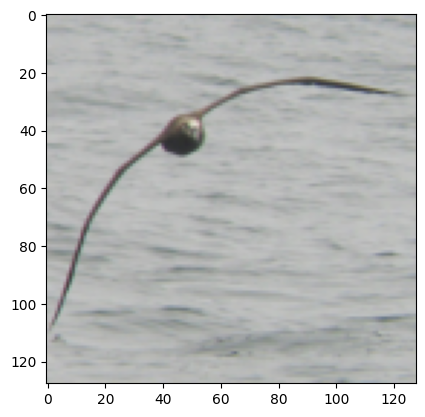

('this bird is almost completely dark gray, it has a light gray crown.', 'a brown bird with white on the supercillary and a brown bill')


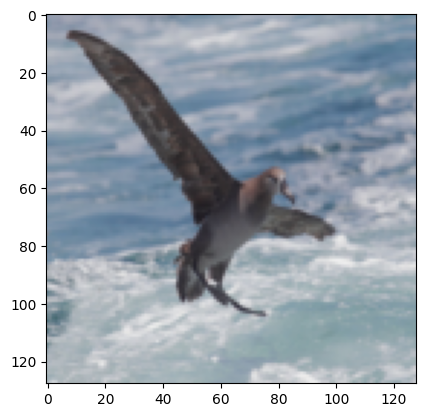

("a large bird has a white belly, long tarsus', and webbed black feet.", 'medium to large sized bird with a grey body and dark wings with white spots around the eyes and tails.')


In [6]:
# Path: muse/muse_maskgit_pytorch/utils_data.py
import os, sys
from muse_maskgit_pytorch import utils_data
import importlib
importlib.reload(utils_data)

utils_data.test()

In [ ]:
from muse_maskgit_pytorch import utils_data
importlib.reload(utils_data)
args = utils_data.get_args()
dataset = utils_data.get_dataset(args, image_size=args.image_size, is_train=True, is_only_image=False)


In [ ]:
# Path: muse/example/train.py
from example import train
import importlib
importlib.reload(train)

args = utils_data.get_args()
train.train_vae(args)
train.train_base(args)
train.train_superres(args)
train.inference(args)



Evaluation with CLIP
with folder:
1. application-test-to-image/muse/dataset_image_origin
2. application-test-to-image/muse/dataset_text_origin
3. application-test-to-image/muse/dataset_image_test
4. application-test-to-image/muse/dataset_text_test

In [11]:
import evaluation_data
import importlib
importlib.reload(evaluation_data)
evaluation_data.save_origin_dataset()

import utils_model
gt_texts = ['this bird is brown with a lighter brown crest.']
images = utils_model.inference(gt_texts)
evaluation_data.save_image_text(images, 
                                gt_texts, 
                                path_name_image="dataset_image_test", 
                                path_name_text="dataset_text_test")


In [ ]:
!pip3 install ftfy regex tqdm
!pip3 install git+https://github.com/openai/CLIP.git
!git clone https://github.com/Taited/clip-score.git

In [ ]:
!python3 src/clip_score/clip_score.py ./dataset_image_origin ./dataset_text_origin
!python3 src/clip_score/clip_score.py ./dataset_image_test ./dataset_text_test